Author: Nick Wagner

Date: 2019-05-07

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pymatgen.core.periodic_table import Element
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)

## Load elemental resistivity and molar refractivity values

In [13]:
res = pd.read_excel("../../data/hammerfeld_criterion/Elemental_conductivities.xlsx")
ref = pd.read_csv("../../data/hammerfeld_criterion/molar_refractivities.csv")

## Convert conductivity units to (ohm*cm)<sup>-1</sup>

In [3]:
res['electrical_conductivity'] = res['Electrical Conductivity Ang'] * 10**6
res.head()

,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity
0,NaN,NaN,Hydrogen,H,1,NaN,NaN,NaN,NaN
1,NaN,NaN,Helium,He,2,NaN,NaN,NaN,NaN
2,1.080000e-01,10^6/cm,Lithium,Li,3,1.100000e+07,1/m Ω,NaN,108000.000000
3,3.130000e-01,10^6/cm Ω,Beryllium,Be,4,2.500000e+07,1/m Ω,NaN,313000.000000
4,1.000000e-12,10^6/cm Ω,Boron,B,5,1.000000e-04,1/m Ω,NaN,0.000001


In [4]:
ref.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refracitivty,Molar volume,MolarVolumeUnit,R/V
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,0.000150
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,0.000023
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,0.000023
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,4.726021
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,2.896619


## Join the resistivity and refractivity tables together

In [5]:
df = ref.merge(res, how='left', right_on='Symbol', left_on='Atom')
df.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refracitivty,Molar volume,MolarVolumeUnit,R/V,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,0.000150,NaN,NaN,Hydrogen,H,1.0,NaN,NaN,NaN,NaN
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,0.000023,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,0.000023,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,4.726021,1.080000e-01,10^6/cm,Lithium,Li,3.0,1.100000e+07,1/m Ω,NaN,1.080000e+05
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,2.896619,3.130000e-01,10^6/cm Ω,Beryllium,Be,4.0,2.500000e+07,1/m Ω,NaN,3.130000e+05
5,5,B,3.030000,1e-24 cm^3,2,calc,MB77,7.643143,0.000004,m^3/mol,1.739331,1.000000e-12,10^6/cm Ω,Boron,B,5.0,1.000000e-04,1/m Ω,NaN,1.000000e-06
6,6,C,1.760000,1e-24 cm^3,2,calc,MB77,4.439581,0.000005,m^3/mol,0.835356,6.100000e-04,10^6/cm Ω,Carbon,C,6.0,1.000000e+05,1/m Ω,Graphite,6.100000e+02
7,7,N,1.100000,1e-24 cm^3,2,calc/index,MB77,2.774738,0.011197,m^3/mol,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,O,0.802000,1e-24 cm^3,2,calc/index,MB77,2.023037,0.011196,m^3/mol,0.000181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,F,0.557000,1e-24 cm^3,2,calc,MB77,1.405027,0.011202,m^3/mol,0.000125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Show resistivity vs. R/V

P


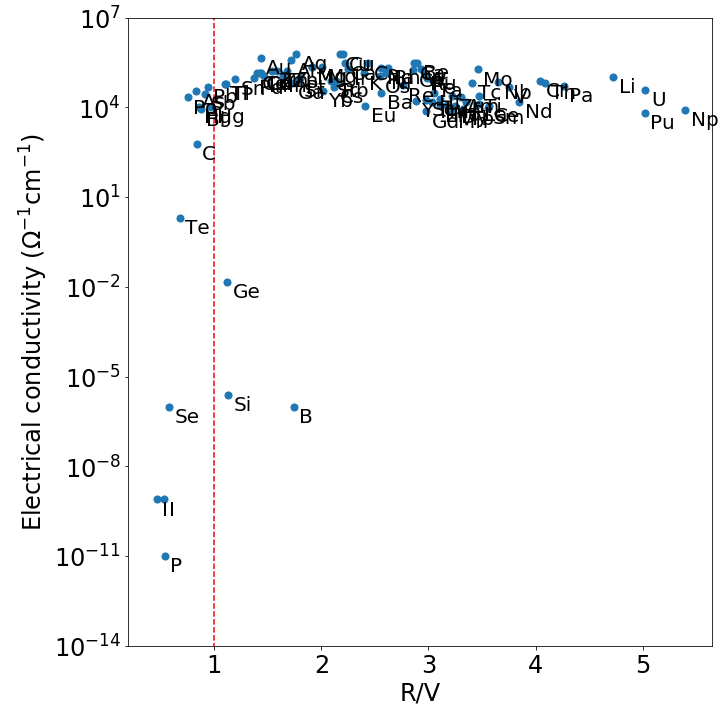

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df['R/V'], df['electrical_conductivity'], s=50)
ax.set_xlabel('R/V', fontsize=24)
ax.set_ylabel(r'Electrical conductivity ($\Omega^{-1}$cm$^{-1}$)', fontsize=24)
ax.set_yscale('log')
ax.set_ybound(lower=1e-14, upper=1e7)
labels = df['Atom']
for i in range(len(df['electrical_conductivity'])):
    if math.isnan(df['electrical_conductivity'].iloc[i]) or math.isnan(df['R/V'].iloc[i]):
        continue
    ax.annotate(labels.iloc[i], 
                (df['R/V'].iloc[i]+0.05,
                 df['electrical_conductivity'].iloc[i]-0.7*df['electrical_conductivity'].iloc[i]),
               fontsize=20)
    if labels.iloc[i] == 'P':
        print(labels.iloc[i])
line = plt.Line2D([1, 1], [0, 1e8], color='red', ls='dashed')
ax.add_line(line)
plt.tight_layout()
plt.show()

## Add element group numbers

In [7]:
def get_groups(name):
    """Find group numbers of the elements"""
    elems = ['Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
                  'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
                  'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk']
    if name in elems:
        g = 3
    else:
        g = Element(name).group
    return g

In [8]:
df['Group'] = df['Atom'].apply(get_groups)

df.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refracitivty,Molar volume,MolarVolumeUnit,...,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity,Group
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,...,NaN,NaN,Hydrogen,H,1.0,NaN,NaN,NaN,NaN,1
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,...,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,...,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,...,0.108,10^6/cm,Lithium,Li,3.0,11000000.0,1/m Ω,NaN,108000.0,1
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,...,0.313,10^6/cm Ω,Beryllium,Be,4.0,25000000.0,1/m Ω,NaN,313000.0,2


In [12]:
df.loc[df['Atom']=='Nd']

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refracitivty,Molar volume,MolarVolumeUnit,...,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity,Group
72,60,Nd,31.4,1e-24 cm^3,25,calc,D84,79.206169,0.000021,m^3/mol,...,0.0157,10^6/cm Ω,Neodymium,Nd,60.0,1600000.0,1/m Ω,NaN,15700.0,3


## Plot R/V vs. Group

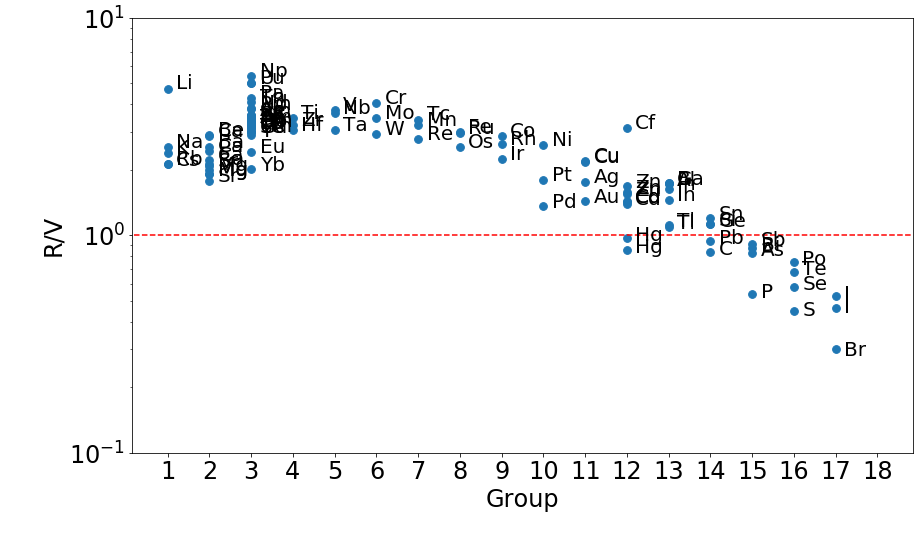

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
scat = ax.scatter(df['Group'], df['R/V'], s=60)
ax.set_xlabel('Group', fontsize=24)
ax.set_ylabel('R/V', fontsize=24)
ax.set_yscale('log')
ax.set_xticks(range(1, 19))
ax.set_ybound(lower=.1, upper=10)

labels = df['Atom']
for i, txt in enumerate(df['R/V']):
    if math.isnan(txt):
        continue
    ax.annotate(labels.iloc[i], 
                (df['Group'].iloc[i]+0.2, df['R/V'].iloc[i]-0.02),
               fontsize=20)

line = plt.Line2D([0, 19], [1, 1], color='red', ls='dashed')
ax.add_line(line)
plt.show()

## Plot Electrical conductivity vs. Group

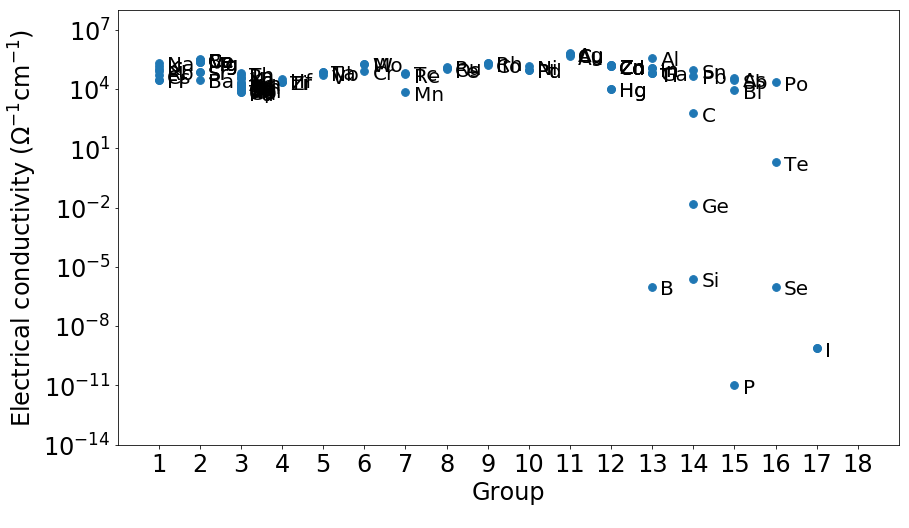

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
scat = ax.scatter(df['Group'], df['electrical_conductivity'], s=60)
ax.set_xlabel('Group', fontsize=24)
ax.set_ylabel(r'Electrical conductivity ($\Omega^{-1}$cm$^{-1}$)', fontsize=24)
ax.set_yscale('log')

ax.set_xbound(lower=0, upper=19)
ax.set_xticks(range(1, 19))
ax.set_ybound(lower=1e-14, upper=1e8)

labels = df['Atom']
for i, txt in enumerate(df['Electrical Conductivity Ang']):
    if math.isnan(txt):
        continue
    ax.annotate(labels.iloc[i], 
                (df['Group'].iloc[i]+0.2, 
                 df['electrical_conductivity'].iloc[i]-0.6*df['electrical_conductivity'].iloc[i]),
               fontsize=20)

plt.show()